# ✈️ Project Overview  
In this project, I will utilize **data cleaning**, **imputation**, **analysis**, and **visualization** techniques to uncover valuable **insights** for a business stakeholder. The goal is to analyze aviation data to help guide critical business decisions.  

This process will involve:
- **Data Cleaning**: Ensuring data accuracy by handling missing values and inconsistencies.
- **Imputation**: Filling in any gaps in the data where necessary.
- **Data Analysis**: Deriving key trends and patterns.
- **Visualization**: Presenting findings in a clear, visually compelling manner for business stakeholders.

![Airplane Image](https://images.pexels.com/photos/358319/pexels-photo-358319.jpeg?cs=srgb&dl=pexels-pixabay-358319.jpg&fm=jpg)  

---  

## 💼 Business Problem  
The company is expanding into new industries to diversify its portfolio. One of these expansions involves purchasing and operating **airplanes** for both **commercial** and **private enterprises**. However, the company has limited knowledge about the **potential risks** associated with different types of aircraft.

### Key Objective:
You are tasked with determining **which aircraft types** pose the **lowest risk** for the company’s new aviation venture. Your analysis will provide **actionable insights** that the head of the aviation division can use to:
- Make informed decisions on **aircraft purchases**.
- Minimize risk as the company enters the aviation sector.
n**: 


# 📚 Importing Relevant Libraries

In this section, I will import the essential libraries needed for **data analysis** and **visualization**. These tools will enable efficient data manipulation, numerical operations, and insightful visualizations for better understanding and communication of the findings.

### Libraries to be Imported:
1. **Pandas**: A powerful library for data manipulation and analysis, offering data structures like DataFrames that simplify handling structured data.
2. **NumPy**: A fundamental package for numerical computing in Python, used for performing fast operations on arrays and matrices.
3. **Seaborn**: A Python visualization library based on Matplotlib, providing beautiful, high-level interface for drawing informative statistical graphics.
4. **Matplotlib**: The foundational library for creating static, animated, and interactive visualizations in Python.
5. **Warnings**: A built-in Python library to suppress or filter out warnings that could clutter the output, helping maintain a clean:arnings('ignore')


In [3]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 📂 Loading the Dataset

In this section, I will load the **AviationData.csv** dataset into a Pandas DataFrame for analysis. This dataset is sourced from Kaggle and contains detailed records of aviation accidents and incidents.

### Key Details:
- **File Encoding**: We will use the `iso-8859-1` encoding to properly handle any special characters in the dataset.
- **Source**: The dataset can be found on Kaggle at the following link: [Aviation Accident Database Synopses](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses).

By loading the dIacan able to explore its structure and contents, setting the foundation for our anFrame
df.head()


In [117]:
# Load the dataset into a DataFrame
df = pd.read_csv('AviationData.csv', encoding='iso-8859-1')

# Display the first few rows of the DataFrame
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# 📏 Checking the Shape of the DataFrame

In this section, I will examine the shape of the DataFrame to gain insights into the dimensions of the dataset. The shape provides crucial information regarding the number of rows (observations) and columns (features) present in the dataset.

### Importance of Understanding the Shape:
- **Rows (Observations)**: Represents the total number of individual records in the dataset, indicating the volume of data available for analysis.
- **Columns (Features)**: Represents the different attributes or variables collected for each observation, giving insight into the breadth of information cap
data_shape
.


In [121]:
# Checking the shape of the DataFrame
df.shape


(88889, 31)

# ℹ️ Checking the Overall Information of the DataFrame

In this section, I will examine the overall information of the DataFrame using the `info()` method. This method provides a comprehensive summary of the dataset, including details about each column's data type, the number of non-null entries, and memory usage.

### Key Insights Provided by `info()`:
- **Data Types**: Understanding the data types of each column (e.g., integers, floats, objects) is essential for determining the appropriate analysis techniques and methods.
- **Non-Null Entries**: The count of non-null entries in each column helps identify any missing values, which may require further handling during data cleaning.
- **Memory Usage**: Provides an estimate of the memory consumed by the DataFrame, allowing us to consider performance implications during an
df.info()
.


In [9]:
# Checking the overall information of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

# 📊 Statistical Description of the DataFrame

In this section, I will generate a statistical description of the DataFrame using the `describe()` method. This method provides summary statistics for the numerical columns in the dataset, offering insights into their distributions and central tendencies.

### Summary Statistics Provided by `describe()`:
- **Count**: The total number of non-null entries for each numerical column.
- **Mean**: The average value, providing a measure of central tendency.
- **Standard Deviation**: Indicates the dispersion or variability of the data around the mean.
- **Minimum and Maximum**: The range of values, showing the smallest and largest observations in each column.
- **Quartile Values**: Includes the 25th (Q1), 50th (Q2 or median), and 75th (Q3) percentiles, which help understand the distribution of ts_description
g.


In [125]:
# Generating a statistical description of the DataFrame
df.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# 📝 Checking the Available Column Names

In this section, I will examine the available column names in the DataFrame using the `columns` attribute. This step is essential for understanding the structure of the dataset and identifying the specific features available for analysis.

### Importance of Checking Column Names:
- **Structure Understanding**: Knowing the column names helps clarify the dataset's organization and the information it contains.
- **Feature Identification**: It allows us to pinpoint specific features for analysis and manipulation, facilitating targeted data exploration.
- **Data Selection**: Familiarity with column names aids in selecting relevant data for further operations, ensuring efficient and effective data haolumn_names

.


In [128]:
# Checking the available column names
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# 🧹 Data Preparation and Cleaning

In this section, I will focus on preparing and cleaning the dataset to ensure it is ready for analysis. A critical step in this process is modifying the column names for better usability and clarity.

### Steps for Data Preparation:
1. **Replace Dots with Spaces**: Dots in column names can lead to confusion and may hinder data manipulation. By replacing them with spaces, we create more readable and user-friendly column names.
2. **Strip Whitespace**: Leading and trailing whitespace can cause issues during data analysis. Stripping whitespace from column names ensures consistency and prevents unexpected ertr.strip()


In [131]:
df.columns = df.columns.str.replace('.', ' ', regex=False).str.strip().str.title()
df.columns


Index(['Event Id', 'Investigation Type', 'Accident Number', 'Event Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type', 'Far Description',
       'Schedule', 'Purpose Of Flight', 'Air Carrier', 'Total Fatal Injuries',
       'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
       'Weather Condition', 'Broad Phase Of Flight', 'Report Status',
       'Publication Date'],
      dtype='object')

# ❓ Checking for Missing Values

In this section, I will check for any missing values in the DataFrame using the `isna().sum()` method. This step is crucial for assessing the quality of the data and identifying any gaps that may affect analysis.

### Importance of Checking for Missing Values:
- **Data Quality Assessment**: Understanding the extent of missing values helps determine the overall quality of the dataset.
- **Informed Decision-Making**: Identifying which columns have missing data allows for informed decisions on how to handle these gaps—whether through imputation (filling in missing values) or removal of affected rows or columns.
- **Impact on Analysis**: Missing values can lead to biased results and inaccurate conclusions; thus, addressing them is vital for maintaining the integrity of the analues_count



In [19]:
# Checking for missing values in the DataFrame
df.isna().sum()



Event Id                      0
Investigation Type            0
Accident Number               0
Event Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport Code              38757
Airport Name              36185
Injury Severity            1000
Aircraft Damage            3194
Aircraft Category         56602
Registration Number        1382
Make                         63
Model                        92
Amateur Built               102
Number Of Engines          6084
Engine Type                7096
Far Description           56866
Schedule                  76307
Purpose Of Flight          6192
Air Carrier               72241
Total Fatal Injuries      11401
Total Serious Injuries    12510
Total Minor Injuries      11933
Total Uninjured            5912
Weather Condition          4492
Broad Phase Of Flight     27165
Report Status              6384
Publication Date          13771
dtype: i

# 🔍 Identifying the Relevant Columns for Data Analysis

In this section, I will identify and select the relevant columns needed for the analysis of aircraft accidents. Focusing on these specific columns will streamline the data exploration process and ensure that the analysis addresses the core aspects of the dataset.

### Relevant Columns for Analysis:
The following columns contain critical information related to aircraft accidents:

- **`Event Date`**: The date when the accident occurred, essential for temporal analysis.
- **`Location`**: The geographical location of the incident, useful for identifying patterns or trends based on geography.
- **`Injury Severity`**: Categorizes the severity of injuries sustained, important for assessing risk levels.
- **`Aircraft Damage`**: Describes the extent of damage to the aircraft, contributing to risk evaluation.
- **`Make`**: Indicates the manufacturer of the aircraft, useful for comparative analysis among different brands.
- **`Model`**: Specifies the aircraft model, providing insights into specific aircraft performance and safety records.

By narrowing down the dataset to these relevant columns, I can concentrate on key aspects necessary for performing a thorough risk analysis and deriving meaningful insights related to ai[relevant_columns]
ore.


In [138]:
# Identifying relevant columns for the analysis
relevant_columns = ['Event Id', 'Event Date', 'Location', 'Country',
                    'Injury Severity', 'Aircraft Damage', 'Make', 'Model',
                    'Amateur Built', 'Number Of Engines', 'Engine Type',
                    'Purpose Of Flight', 'Total Fatal Injuries',
                    'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured',
                    'Weather Condition']

# Creating a new DataFrame with only the relevant columns
df_relevant = df[relevant_columns]

# Display the first few rows of the filtered DataFrame
df_relevant.head()

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


# ❓ Checking Missing Values for the Relevant Columns

After filtering the dataset to include only the relevant columns, it is essential to check for any missing values within these selected columns. Identifying missing data is a critical step in the data cleaning process, as it informs the strategies for addressing gaps in the dataset.

### Importance of Checking Missing Values:
- **Data Quality Awareness**: Understanding the presence and extent of missing values in the relevant columns allows for an assessment of the dataset's overall quality.
- **Impact on Analysis**: Missing values can skew analysis results and lead to inaccurate conclusions, making it imperative to address them before proceeding.
- **Informed Handling Strategies**: Recognizing which columns have missing data enables the development of appropriate strategies—whether through imputation, removal, or further investiues_relevant
.


In [141]:
# Checking missing values in the relevant columns
df_relevant.isnull().sum()


Event Id                      0
Event Date                    0
Location                     52
Country                     226
Injury Severity            1000
Aircraft Damage            3194
Make                         63
Model                        92
Amateur Built               102
Number Of Engines          6084
Engine Type                7096
Purpose Of Flight          6192
Total Fatal Injuries      11401
Total Serious Injuries    12510
Total Minor Injuries      11933
Total Uninjured            5912
Weather Condition          4492
dtype: int64

# 🚫 Dropping Missing Values for Key Columns

To ensure the integrity and accuracy of the analysis, I will remove rows with missing values in key columns that are crucial for understanding the nature and causes of aircraft accidents. 

### Key Columns for Consideration:
The following columns will be prioritized for this operation:
- **`Location`**: Essential for geographic analysis of accident patterns.
- **`Injury Severity`**: Important for assessing the impact of accidents and identifying risk factors.
- **`Aircraft Damage`**: Provides insight into the extent of damage, which is vital for safety assessments.
- **`Make`**: Crucial for analyzing safety records across different aircraft manufacturers.

Missing data in any of these fields can significantly skew the results, leading to inaccurate insights. Therefore, it is essential to clean the dataset by dropping rows with missing values in these kening_missing_values
t.


In [144]:
# Columns that will drop missing values
drop_columns = ['Location', 'Country',
       'Injury Severity', 'Aircraft Damage',
       'Make', 'Model',
       'Amateur Built', 'Number Of Engines', 'Engine Type',
       'Purpose Of Flight',
       'Weather Condition']

# Dropping rows with missing values in the selected columns
df_relevant = df_relevant.dropna(subset=drop_columns)

# Checking for any remaining missing values
df_relevant.isnull().sum()


Event Id                      0
Event Date                    0
Location                      0
Country                       0
Injury Severity               0
Aircraft Damage               0
Make                          0
Model                         0
Amateur Built                 0
Number Of Engines             0
Engine Type                   0
Purpose Of Flight             0
Total Fatal Injuries       9386
Total Serious Injuries    10248
Total Minor Injuries       9525
Total Uninjured            4692
Weather Condition             0
dtype: int64

# 🏥 Replacing Missing Values in Injury Columns

For the columns that record the number of injuries—specifically **`Total Fatal Injuries`**, **`Total Serious Injuries`**, **`Total Minor Injuries`**, and **`Total Uninjured`**—I will replace any missing values with zero. 

### Rationale for This Approach:
- **Assumption of No Injuries**: The decision to fill missing values with zero is based on the assumption that if data on injuries is absent, it indicates that no injuries occurred during the accident.
- **Avoiding Skewed Analysis**: By replacing null values with zero, I ensure that the analysis is not skewed by missing data, which could lead to misleading conclusions about the severity of incidents.
- **Maintaining Data Integrity**: This method preserves the integrity of the dataset while allowing for a more accurate representation of the injury].fillna(0)
t.


In [147]:
# Columns that need replacing the null values
replace_columns = ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']

# Replacing null values in relevant injury columns with 0
df_relevant[replace_columns] = df_relevant[replace_columns].fillna(0)

# Checking if there are any remaining null values
df_relevant.isnull().sum()


Event Id                  0
Event Date                0
Location                  0
Country                   0
Injury Severity           0
Aircraft Damage           0
Make                      0
Model                     0
Amateur Built             0
Number Of Engines         0
Engine Type               0
Purpose Of Flight         0
Total Fatal Injuries      0
Total Serious Injuries    0
Total Minor Injuries      0
Total Uninjured           0
Weather Condition         0
dtype: int64

# 🌍 Formatting the Location Column

To ensure consistency and clarity in the **`Location`** column, I will standardize its formatting. This process involves two key steps:

### Standardization Steps:
1. **Capitalization**: Capitalizing the first letter of each word improves readability and makes the data more visually appealing.
2. **State Abbreviations**: Ensuring that state abbreviations are in uppercase guarantees uniformity and prevents any potential confusion when analyzing geographic data.

### Benefits of Formatting:
- **Improved Uniformity**: Consistent formatting helps maintain a clean dataset, which is essential for accurate analysis.
- **Easier Data Handling**: Standardized entries facilitate smoother data manipulation and filtering o, regex=True)
s.


In [150]:
# Standardizing the 'Location' column
df_relevant['Location'] = df_relevant['Location'].str.title().str.replace(r',\s*(\w{2})$', lambda x: x.group(0).upper(), regex=True)

# Displaying the first few rows to confirm changes
df_relevant.head()
                                               

,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"Moose Creek, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC


## 📅 Converting 'Event Date' to Datetime Format

In this section, I will convert the **`Event Date`** column to a datetime format. This transformation is crucial for conducting time series analyses and extracting specific components of the date, such as year, month, and day.

### Importance of Datetime Conversion:
- **Facilitates Time Series Analysis**: By converting dates into a proper datetime format, I can perform various time-related analyses, such as trend analysis, seasonality detection, and temporal correlations.
- **Enhanced Data Manipulation**: Datetime objects allow for easier manipulation, such as filtering data by specific date ranges, grouping by month or year, and calculating time differences.
- **Extraction of Date Components**: Once in datetime format, it becomes straightforward to extract individual components (e.g., year, month) for further analysis or visualiz='coerce')



In [153]:
# Convert the 'Event Date' column to datetime format
# We use pd.to_datetime() to ensure the column is in the correct format for date operations.
df_relevant['Event Date'] = pd.to_datetime(df_relevant['Event Date'], errors='coerce')

# Display the updated DataFrame to verify the conversion
df_relevant


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition
0,20001218X45444,1948-10-24,"Moose Creek, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,CESSNA,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC
88647,20221011106098,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,CESSNA,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC
88661,20221018106153,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,BEECH,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC
88735,20221031106231,2022-10-29,"Houston, TX",United States,Minor,Substantial,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC


## 📊 Extracting the Year from the 'Event Date' Column

In this section, I will extract the year from the **`Event Date`** column of the DataFrame and create a new column named **`Year`**. This step is essential for analyzing trends in aircraft accidents over the years.

### Benefits of Extracting the Year:
- **Trend Analysis**: Having a dedicated year column allows for straightforward analysis of trends in accident frequency, severity, and other related factors over time.
- **Data Aggregation**: It facilitates grouping data by year, enabling more insightful visualizations and summary statistics.
- **Temporal Insights**: By examining year-over-year changes, I can identify patterns, such as increases or decreases in accident occurrences and correlate them with external factors like regulatory changes or advancements in safety techne'].dt.year

.


In [156]:
# Extract the year from the 'Event Date' column
# We use string slicing to get the first four characters representing the year.
df_relevant['Year'] = df_relevant['Event Date'].astype(str).str[:4]
# Display the updated DataFrame to verify the new 'Year' column has been added
df_relevant


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
0,20001218X45444,1948-10-24,"Moose Creek, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,1948
1,20001218X45447,1962-07-19,"Bridgeport, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,1962
2,20061025X01555,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,1974
3,20001218X45448,1977-06-19,"Eureka, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1977
6,20001218X45446,1981-08-01,"Cotton, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,20221011106092,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,CESSNA,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88647,20221011106098,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,CESSNA,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2022
88661,20221018106153,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,BEECH,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
88735,20221031106231,2022-10-29,"Houston, TX",United States,Minor,Substantial,STEPHEN J HOFFMAN,MS-500,Yes,1.0,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,2022


## 🚫 Removing Data for Years Before 1962

In this section, I will filter out any entries from the DataFrame that have a **`Year`** earlier than **1962**. This step is crucial for focusing the analysis on more relevant and modern data, as older data may not reflect current aviation practices or technologies.

### Steps to Filter Data:
1. **Convert Year to Numeric Format**: Since the values in the **`Year`** column are currently in string format, I will first convert them to a numeric format. This conversion allows for proper comparison and filtering.
2. **Apply Filtering**: After conversion, I will remove any entries where the year is less than 1962.

### Importance of This Filtering:
- **Relevance**: Analyzing data from 1962 onwards ensures that the insights are applicable to contemporary aviation contexts and practices.
- **Data Quality**: Older records may contain outdated information that could skew the analysis, making this filtering essential for data iYear'] >= 1962]
.


In [161]:
# Convert the 'Year' column to numeric format
# This ensures we can perform numerical comparisons. Invalid parsing will be set as NaN.
df_relevant['Year'] = pd.to_numeric(df_relevant['Year'], errors='coerce')

# Filter the DataFrame to remove entries with years before 1962
df_relevant = df_relevant[df_relevant['Year'] >= 1962]

# Display a random sample of 10 entries from the updated DataFrame
df_relevant.sample(n=10)


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
34153,20001211X13703,1993-11-14,"Sterling, MA",United States,Non-Fatal,Substantial,Gulfstream American,AA-5B,No,1.0,Reciprocating,Personal,0.0,0.0,4.0,0.0,VMC,1993
80682,20170926X23016,2017-09-25,"Cleburne, TX",United States,Fatal,Destroyed,Eris E. Ervin,Quicksilver,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,2017
42678,20001208X08933,1997-09-13,"The Dalles, OR",United States,Non-Fatal,Substantial,Piper,PA-44-180,No,2.0,Reciprocating,Instructional,0.0,0.0,0.0,4.0,VMC,1997
24446,20001213X29821,1989-11-10,"Chino, CA",United States,Non-Fatal,Substantial,Bell-kitz Kopters,47D1,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1989
5010,20001214X43254,1983-06-11,"Detroit, MI",United States,Non-Fatal,Substantial,Bell,47G5A,No,1.0,Reciprocating,Public Aircraft,0.0,0.0,1.0,1.0,VMC,1983
78220,20160517X40205,2016-05-12,"Wickenburg, AZ",United States,Non-Fatal,Substantial,PIPER,PA28,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2016
8410,20001214X39622,1984-05-28,"Half Moon Bay, CA",United States,Fatal(2),Destroyed,Cessna,152,No,1.0,Reciprocating,Instructional,2.0,1.0,2.0,0.0,VMC,1984
38427,20001207X04559,1995-09-29,"Okeechobee, FL",United States,Non-Fatal,Substantial,Beech,D50E,No,2.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,1995
30665,20001211X15006,1992-06-18,"Woodland, WA",United States,Fatal(1),Destroyed,William Bovard,GLASAIR,Yes,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,1992
10472,20001214X41804,1984-12-12,"Rosamond, CA",United States,Fatal(2),Destroyed,Cessna,152,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,1984


## 🚀 Removing Outlier Years with a Count of 1

In this section, I will remove years from the DataFrame that have only **1 occurrence**. These years are considered outliers and may not provide meaningful insights or trends for the analysis.

### Reasons for Removing Outlier Years:
1. **Statistical Noise**: Years with only a single entry can introduce noise into the analysis, leading to skewed interpretations or misleading conclusions.
2. **Lack of Representation**: A solitary data point does not reflect broader trends or patterns in the aviation accident data, making it difficult to draw reliable insights.
3. **Focus on Significant Trends**: By excluding these outlier years, I can concentrate on more significant and representative trends that are more informative for decision-making.

### Steps to Remove Outlier Years:
1. **Group by Year**: Count the occurrences of accidents for each year.
2. **Filter Out Low Counts**: Retain only those years with more than one on(outlier_years)]


In [164]:
# Count occurrences of each year
year_counts = df_relevant['Year'].value_counts()

# Identify years with counts greater than 1
years_to_keep = year_counts[year_counts > 1].index

# Filter the DataFrame to keep only those years
df_relevant = df_relevant[df_relevant['Year'].isin(years_to_keep)]

# Display a random sample of 10 entries from the updated DataFrame
df_relevant.sample(n=10)


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
2628,20020917X04390,1982-09-03,"Waconia, MN",United States,Non-Fatal,Destroyed,Bell,47G-5A,No,1.0,Reciprocating,Instructional,0.0,1.0,1.0,0.0,VMC,1982
5478,20001214X43775,1983-07-16,"Grass Valley, CA",United States,Fatal(3),Destroyed,Cessna,177,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,VMC,1983
50332,20010416X00763,2001-04-07,"Lurton, AR",United States,Fatal(2),Destroyed,Cessna,190,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,2001
27903,20001212X17031,1991-05-05,"Fernley, NV",United States,Non-Fatal,Substantial,Cessna,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1991
58736,20050926X01531,2005-05-29,"Englewood, CO",United States,Non-Fatal,Substantial,Mooney,M20K,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2005
6146,20001214X44586,1983-09-04,"Santa Paula, CA",United States,Non-Fatal,Substantial,Cessna,182L,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,IMC,1983
58700,20050622X00840,2005-05-24,"Harvey, LA",United States,Non-Fatal,Substantial,Cessna,210L,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2005
76524,20150424X91445,2015-04-17,"Deer Lodge, MT",United States,Non-Fatal,Substantial,PIPER,PA 28-180,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2015
80791,20171024X22615,2017-10-21,"Gerlach, NV",United States,Non-Fatal,Substantial,CHAMPION,7GC,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2017
48891,20001212X21428,2000-07-18,"Moab, UT",United States,Fatal(2),Destroyed,Grumman American,AA-5,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,2000


## 🔄 Replacing 'UNK' and 'Unk' Values with 'Unknown'

In this section, I will replace all instances of the values **`"UNK"`** and **`"Unk"`** in the DataFrame with the string **`"Unknown"`**. This standardization is essential for ensuring clarity and consistency in the dataset.

### Importance of Standardizing Values:
1. **Data Consistency**: Standardizing unknown or missing values helps maintain uniformity throughout the dataset, making it easier to analyze and interpret.
2. **Improved Analysis**: Clear labeling of unknown values as **`"Unknown"`** prevents potential confusion during data analysis and visualizations.
3. **Facilitates Data Cleaning**: Having a uniform value for unknowns simplifies further cleaning and manipulation of the dataset, especially when filtering or aggregating data.

### Steps to Replace Values:
- Use the **`replace()`** method in Pandas to change all occurrences of **`"UNK"`** and **`"Unk"`** to **`"Unk inplace=True)

.


In [167]:
# Replace all occurrences of "UNK" and "Unk" with "Unknown"
df_relevant = df_relevant.replace(["UNK", "Unk"], "Unknown")

# Display a sample of the DataFrame to verify the replacements
df_relevant.sample(n=10)



,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
78430,20160620X34145,2016-06-17,"Goodnews Bay, AK",United States,Non-Fatal,Substantial,CESSNA,207,No,1.0,Reciprocating,Positioning,0.0,0.0,1.0,0.0,IMC,2016
25800,20001212X23304,1990-06-17,"Chandler, AK",United States,Non-Fatal,Substantial,Cessna,185,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,1990
77144,20150814X91539,2015-08-14,"Pacific Ocean, PO",United States,Fatal,Destroyed,BARTELS,Lancair,No,1.0,Turbo Prop,Personal,1.0,0.0,0.0,0.0,VMC,2015
31888,20001211X16136,1992-12-01,"Milwaukee, WI",United States,Non-Fatal,Substantial,Beech,77,No,1.0,Reciprocating,Instructional,0.0,0.0,1.0,0.0,VMC,1992
26435,20001212X23874,1990-08-24,"Kodiak, AK",United States,Non-Fatal,Substantial,Piper,PA-22-150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1990
58403,20050504X00548,2005-04-03,"Union City, SC",United States,Non-Fatal,Substantial,Cessna,310J,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2005
66571,20090530X50637,2009-06-18,"Yerington, NV",United States,Non-Fatal,Substantial,GRUMMAN,G-164A,No,1.0,Reciprocating,Aerial Application,0.0,1.0,0.0,0.0,VMC,2009
46071,20001212X18883,1999-05-08,"Portland, OR",United States,Non-Fatal,Substantial,Beech,36,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1999
60842,20060810X01140,2006-06-13,"Shelby, NC",United States,Non-Fatal,Substantial,Cessna,150M,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC,2006
8132,20001214X39502,1984-05-04,"Ft Atkinson, WI",United States,Non-Fatal,Substantial,Cessna,152,No,1.0,Reciprocating,Instructional,0.0,0.0,1.0,0.0,VMC,1984


## ✍️ Standardizing Capitalization in Columns

In this section, I will standardize the capitalization in the **`'Make'`**, **`'Purpose Of Flight'`**, and **`'Aircraft Damage'`** columns of the DataFrame. This process will involve converting the text in these columns to title case, ensuring consistency and improving readability.

### Importance of Standardizing Capitalization:
1. **Enhanced Readability**: Title casing makes the text more visually appealing and easier to read, particularly in reports and visualizations.
2. **Data Consistency**: Uniform capitalization across these key columns helps maintain a standardized format, which is crucial for data integrity during analysis.
3. **Facilitating Analysis**: Consistent text formatting reduces potential errors during filtering, grouping, or merging operations, ensuring that similar entries are recognized correctly.

### Steps to Standardize Capitalization:
- Utilize the **`str.title()`** method to convert the text in the specified columns to tiage'].str.title()
.


In [170]:
# Apply title case to 'Make', 'Purpose Of Flight', and 'Aircraft Damage' columns
df_relevant[['Make', 'Purpose Of Flight', 'Aircraft Damage']] = df_relevant[['Make', 'Purpose Of Flight', 'Aircraft Damage']].apply(lambda col: col.str.title())

# Display a sample of the DataFrame to verify the changes
df_relevant.sample(n=10)


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
26567,20001212X24148,1990-09-08,"Mckinley Park, AK",United States,Fatal(2),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,1990
62665,20070629X00847,2007-06-08,"Erie, CO",United States,Non-Fatal,Substantial,Aeronca,7AC,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC,2007
47887,20001212X20442,2000-02-21,"Kotzebue, AK",United States,Non-Fatal,Substantial,Piper,PA-31-T3,No,2.0,Turbo Prop,Unknown,0.0,0.0,1.0,0.0,IMC,2000
46602,20001212X19135,1999-07-15,"Juneau, AK",United States,Non-Fatal,Substantial,Hughes,269A,No,1.0,Reciprocating,Business,0.0,0.0,2.0,0.0,VMC,1999
39672,20001208X05730,1996-05-25,"Osage Beach, MO",United States,Non-Fatal,Substantial,Piper,PA-32,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,1996
29757,20001211X14012,1992-01-20,"Boulder, NV",United States,Non-Fatal,Substantial,Cessna,182R,No,1.0,Reciprocating,Instructional,0.0,0.0,1.0,0.0,VMC,1992
70161,20110630X00820,2011-06-18,"Carbondale, PA",United States,Non-Fatal,Substantial,Aeronca,7AC,No,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,2011
28476,20001212X17591,1991-07-08,"Reno, NV",United States,Non-Fatal,Substantial,Cessna,320,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1991
80702,20170928X24944,2017-09-28,"Orangeburg, SC",United States,Non-Fatal,Destroyed,Piper,PA 22,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2017
4832,20001214X43076,1983-05-29,"Lake Butler, FL",United States,Non-Fatal,Destroyed,Piper,PA-32-260,No,1.0,Reciprocating,Personal,0.0,1.0,2.0,0.0,Unknown,1983


## ✂️ Removing Leading and Trailing Whitespaces from String Columns

In this section, I will remove any leading and trailing whitespaces from all string columns in the DataFrame **`df_relevant`**. This step is crucial for ensuring that the data is clean, consistent, and ready for accurate analysis.

### Importance of Removing Whitespaces:
1. **Data Integrity**: Leading and trailing whitespaces can lead to unexpected behavior during data manipulation and analysis, such as mismatched joins or incorrect filtering.
2. **Improved Accuracy**: Cleaning the data by removing unnecessary spaces enhances the accuracy of the analysis, ensuring that similar entries are correctly identified.
3. **Streamlined Processing**: Removing extraneous whitespace can optimize the processing time and efficiency of subsequent data operations.

### Steps to Remove Whitespaces:
- Apply the **`str.strip()`** method to all string columns in the DataFrame to eliminate any unwanted leading or trailinject" else x)
s.


In [173]:
# Remove leading and trailing whitespaces from all string columns in the DataFrame
df_relevant = df_relevant.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Display the first few rows of the updated DataFrame to verify the changes
df_relevant.head()


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
7,20020909X01562,1982-01-01,"Pullman, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,20020909X01561,1982-01-01,"East Hanover, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
9,20020909X01560,1982-01-01,"Jacksonville, FL",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,1982
10,20020909X01559,1982-01-01,"Hobbs, NM",United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
11,20020909X01558,1982-01-01,"Tuskegee, AL",United States,Non-Fatal,Substantial,Beech,V35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982


## 💾 Saving the Cleaned Data to a CSV File

In this section, I will save the cleaned DataFrame **`df_relevant`** to a CSV file named **`cleaned_AviationData.csv`**. This step is essential for preserving the cleaned dataset, making it accessible for future analyses and sharing with stakeholders.

### Importance of Saving Cleaned Data:
1. **Data Preservation**: Saving the cleaned dataset ensures that the modifications made during the data cleaning process are not lost and can be easily retrieved.
2. **Future Use**: The cleaned CSV file can be utilized in subsequent analyses, facilitating a more efficient workflow by eliminating the need to repeat the cleaning steps.
3. **Sharing and Collaboration**: Having the cleaned data in a widely-used format like CSV makes it easier to share with team members or stakeholders for further insights or reporting.

### Steps to Save the Data:
- Utilize the **`to_csv()`** method in Pandas to export the cleaned DataFrame to a  index=False)
s.


In [176]:
# Save the cleaned DataFrame to a CSV file without including the index
df_relevant.to_csv('cleaned_AviationData.csv', index=False)

# Display a message indicating that the file has been saved
print("Cleaned data has been saved to 'cleaned_AviationData.csv'.")


Cleaned data has been saved to 'cleaned_AviationData.csv'.


## 📥 Loading the Cleaned Data from CSV

In this section, I will load the cleaned data from the CSV file **`cleaned_AviationData.csv`** into a new DataFrame named **`df_cleaned`**. This step is crucial for allowing us to work with the refined dataset in our subsequent analyses.

### Importance of Loading Cleaned Data:
1. **Access to Cleaned Data**: Loading the cleaned dataset ensures that we can directly work with data that has already been processed, saving time and effort in data preparation.
2. **Consistency**: By using the cleaned data, we maintain consistency in our analyses, as we are starting with a dataset free from the issues identified during earlier stages.
3. **Streamlined Workflow**: Having the cleaned data readily available enables a smoother workflow, allowing for more focus on analysis and insight genertionData.csv')


In [47]:
# Load the cleaned data from the CSV file into a new DataFrame
df_cleaned = pd.read_csv('cleaned_AviationData.csv')

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
df_cleaned


,Event Id,Event Date,Location,Country,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number Of Engines,Engine Type,Purpose Of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Year
0,20020909X01562,1982-01-01,"Pullman, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
1,20020909X01561,1982-01-01,"East Hanover, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
2,20020909X01560,1982-01-01,"Jacksonville, FL",United States,Non-Fatal,Substantial,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,1982
3,20020909X01559,1982-01-01,"Hobbs, NM",United States,Non-Fatal,Substantial,Piper,PA-28-161,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
4,20020909X01558,1982-01-01,"Tuskegee, AL",United States,Non-Fatal,Substantial,Beech,V35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75325,20221011106092,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,Cessna,150,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
75326,20221011106098,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,Cessna,177RG,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2022
75327,20221018106153,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,Beech,B-60,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2022
75328,20221031106231,2022-10-29,"Houston, TX",United States,Minor,Substantial,Stephen J Hoffman,MS-500,Yes,1.0,Reciprocating,Asho,0.0,1.0,0.0,0.0,VMC,2022


##  🛠️ Checking the Structure of the Cleaned DataFrame

In this section, I will use the **`info()`** method to display the structure and summary of the cleaned DataFrame **`df_cleaned`**. This method provides valuable insights into the dataset, including:

- **Entry Count**: The total number of rows (entries) in the DataFrame.
- **Column Count**: The total number of columns in the DataFrame.
- **Non-Null Counts**: The number of non-null entries for each column, which helps in identifying any remaining missing values.
- **Data Types**: The data type of each column, indicating how the data is stored and what operations can be performed on it.
- **Memory Usage**: The amount of memory consumed by the DataFrame, which can help assess the dataset's efficiency.


In [182]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75330 entries, 0 to 75329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Event Id                 75330 non-null  object 
 1   Event Date               75330 non-null  object 
 2   Location                 75330 non-null  object 
 3   Country                  75330 non-null  object 
 4   Injury Severity          75330 non-null  object 
 5   Aircraft Damage          75330 non-null  object 
 6   Make                     75330 non-null  object 
 7   Model                    75330 non-null  object 
 8   Amateur Built            75330 non-null  object 
 9   Number Of Engines        75330 non-null  float64
 10  Engine Type              75330 non-null  object 
 11  Purpose Of Flight        75330 non-null  object 
 12  Total Fatal Injuries     75330 non-null  float64
 13  Total Serious Injuries   75330 non-null  float64
 14  Total Minor Injuries  

In [184]:
df_cleaned.describe()

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Year,Injury Severity Numeric
count,75330.000000,75330.000000,75330.000000,75330.000000,75330.000000,75330.000000,75330.000000
mean,1.116620,0.391026,0.203199,0.281654,2.181933,1997.380605,45.028076
std,0.379842,2.811839,0.747998,1.213177,14.787201,11.138595,17.490542
min,0.000000,0.000000,0.000000,0.000000,0.000000,1982.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000,53.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1996.000000,53.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,53.000000
max,8.000000,270.000000,81.000000,125.000000,699.000000,2022.000000,55.000000


In [186]:
df_cleaned.shape

(75330, 19)

## 1. Is it safe to invest in the Aviation Industry?
The aviation industry is an old industry that has evolved over the years. To know if the industry is a good investment, it is important to analyze its safety record over time. This will be done by showing the number of accidents per year over time.

In [189]:
# Sort the 'Year' values in ascending order and arrange corresponding counts
years = sorted(df_cleaned['Year'].value_counts().index.tolist())
number_of_accidents_per_year = [df_cleaned['Year'].value_counts()[year] for year in years]

print("Years (sorted):", years)
print("Number of accidents (sorted):", number_of_accidents_per_year)


Years (sorted): [1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Number of accidents (sorted): [3503, 3411, 3317, 2996, 2749, 2699, 2606, 2443, 2419, 2386, 2285, 2227, 2091, 2149, 2039, 1946, 1993, 1992, 1913, 1657, 1672, 1707, 1599, 1661, 1491, 1621, 1521, 1449, 1395, 1437, 1441, 1168, 1139, 1163, 1210, 1171, 1170, 1042, 727, 316, 409]


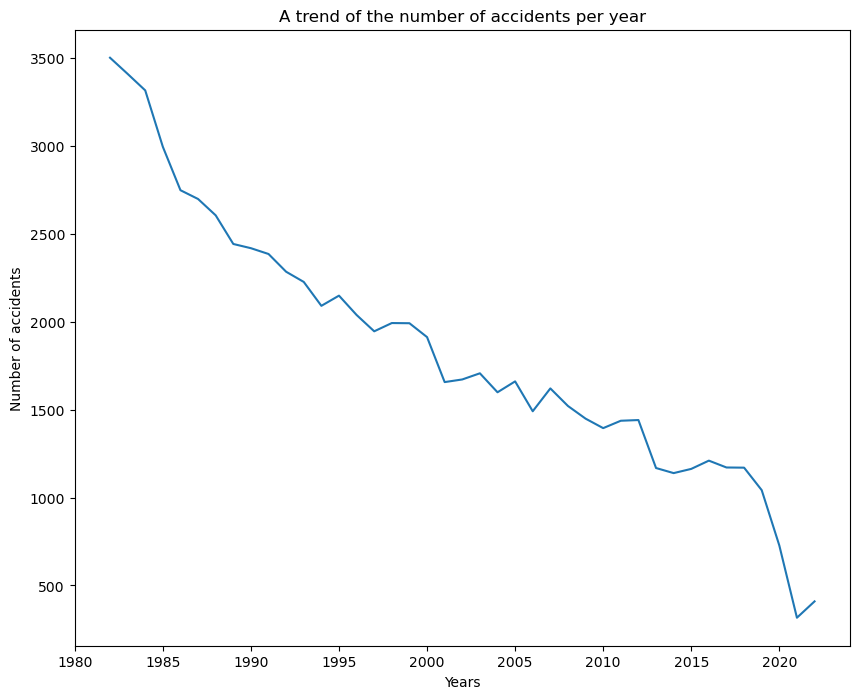

In [191]:
#plot a line graph that shows the trend of accidents overtime
#I included the years from 1982 moving forward as before there were not many flights
x = years
y = number_of_accidents_per_year
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(x,y)
ax.set_xlabel('Years')
ax.set_ylabel('Number of accidents')
ax.set_title('A trend of the number of accidents per year')
plt.show();

In [193]:
'''
The consistent drop in aviation accidents suggests probably significant improvements in safety measures,
technology, and regulatory oversight, enhancing public confidence in air travel. 
This trend may indicate a stable and growing market, presenting low-risk investment opportunities for stakeholders. 
Additionally, airlines prioritizing safety can gain a competitive advantage, attracting more customers and investors.
'''

'\nThe consistent drop in aviation accidents suggests probably significant improvements in safety measures,\ntechnology, and regulatory oversight, enhancing public confidence in air travel. \nThis trend may indicate a stable and growing market, presenting low-risk investment opportunities for stakeholders. \nAdditionally, airlines prioritizing safety can gain a competitive advantage, attracting more customers and investors.\n'

## 2.Which purpose of flight category has the highest accident rate, and what factors contribute to this trend?

In [195]:
Counts_of_accidents = df_cleaned['Purpose Of Flight'].value_counts()
purpose_of_flight = Counts_of_accidents.index
print(Counts_of_accidents)
print(purpose_of_flight)


Purpose Of Flight
Personal                     45898
Instructional                 9927
Unknown                       5159
Aerial Application            4486
Business                      3691
Positioning                   1481
Other Work Use                1063
Ferry                          747
Aerial Observation             665
Public Aircraft                651
Executive/Corporate            483
Flight Test                    343
Skydiving                      163
Banner Tow                      94
External Load                   92
Public Aircraft - Federal       86
Public Aircraft - Local         67
Public Aircraft - State         59
Air Race Show                   57
Air Race/Show                   48
Glider Tow                      35
Firefighting                    22
Air Drop                         8
Pubs                             2
Asho                             2
Publ                             1
Name: count, dtype: int64
Index(['Personal', 'Instructional', 'Unknown',

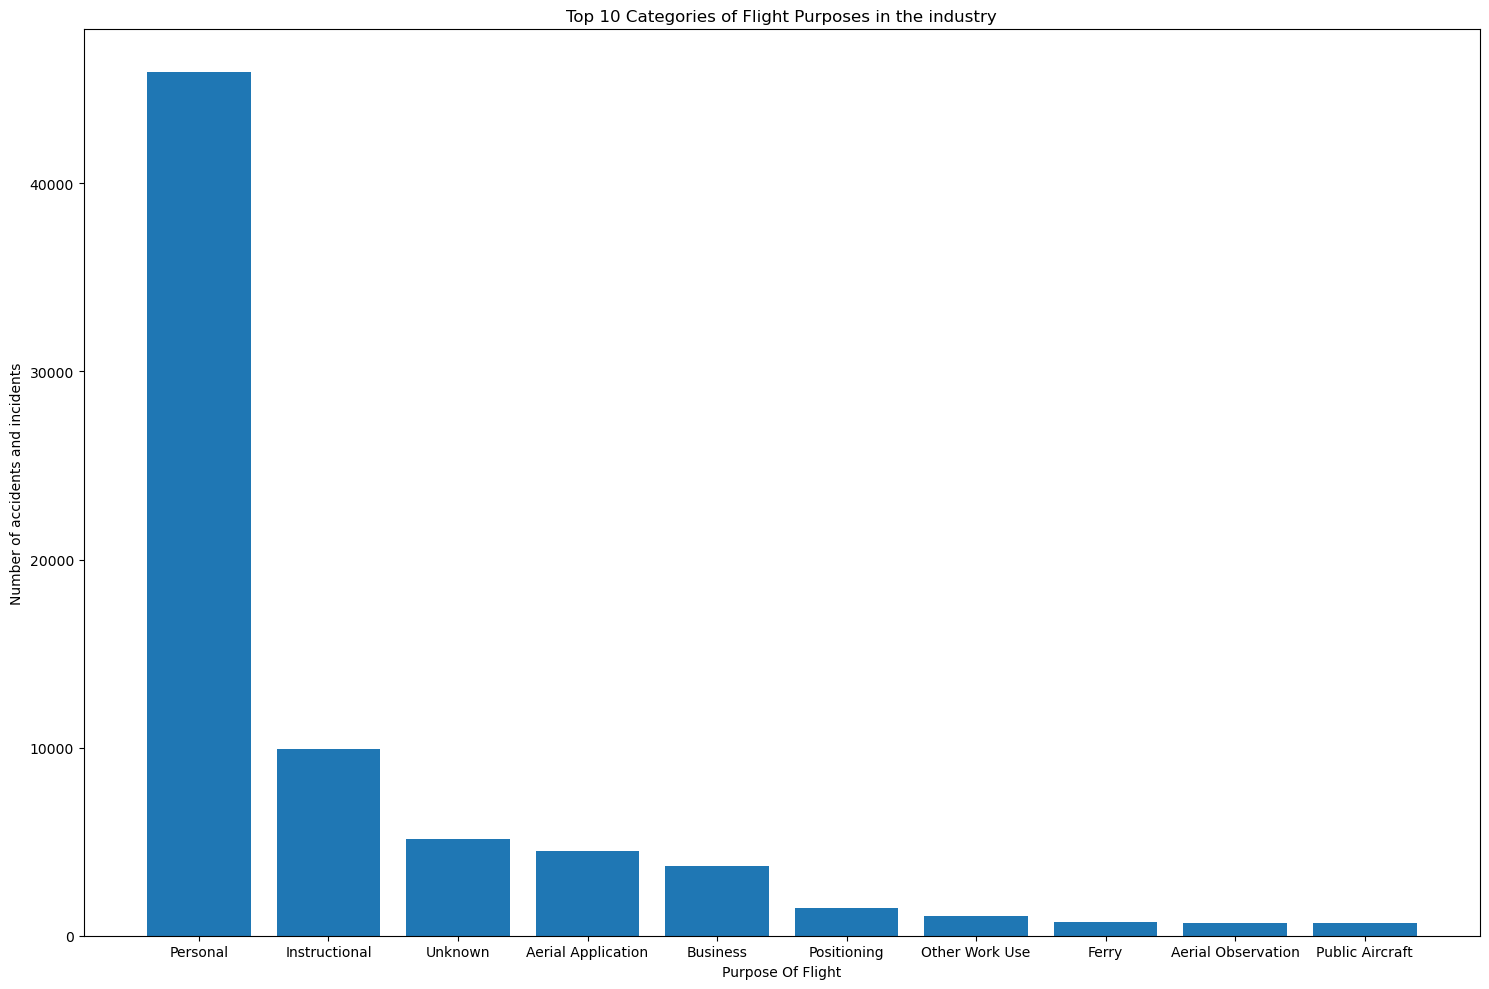

In [197]:
fig,ax = plt.subplots(figsize = (15,10))
fig.set_tight_layout(True)
ax.bar(purpose_of_flight[:10],Counts_of_accidents[:10])
ax.set_xlabel('Purpose Of Flight')
ax.set_ylabel('Number of accidents and incidents')
ax.set_title('Top 10 Categories of Flight Purposes in the industry')
plt.show();

In [199]:
'''
The data reveals that personal flights account for the highest number of accidents (45,898), 
followed by instructional flights (9,927), indicating significant safety concerns in these areas. 
Additionally, the prevalence of unknown incidents (5,159) suggests gaps in reporting that need to be addressed to enhance overall aviation safety. 
Targeted safety measures and improved training protocols could be crucial for reducing risks associated with personal and instructional flying.
'''

'\nThe data reveals that personal flights account for the highest number of accidents (45,898), \nfollowed by instructional flights (9,927), indicating significant safety concerns in these areas. \nAdditionally, the prevalence of unknown incidents (5,159) suggests gaps in reporting that need to be addressed to enhance overall aviation safety. \nTargeted safety measures and improved training protocols could be crucial for reducing risks associated with personal and instructional flying.\n'

## 3.How do the accident rates of the top aircraft makes compare to the purposes of flight, and what are the implications for safety measures in different flight categories?

### This question builds on the previous analysis of flight purposes by linking it to the makes of aircraft involved in accidents, providing a more comprehensive view of safety risks in aviation.

In [205]:
Counts_of_accidents_incidents = df_cleaned['Make'].value_counts()
Make_of_Aircraft = Counts_of_accidents_incidents.index
print(Counts_of_accidents_incidents)
print(Make_of_Aircraft)

Make
Cessna               24932
Piper                13739
Beech                 4772
Bell                  2107
Mooney                1254
                     ...  
C.B. Withun              1
Reinhold                 1
Zeidler                  1
W.S. Bowers, Jr.         1
Stephen J Hoffman        1
Name: count, Length: 6884, dtype: int64
Index(['Cessna', 'Piper', 'Beech', 'Bell', 'Mooney', 'Grumman', 'Bellanca',
       'Robinson', 'Hughes', 'Boeing',
       ...
       'The Old Hen Crow', 'Horner-Ryan', 'Ilyushin', 'Tomschin',
       'Becker Wag Aero', 'C.B. Withun', 'Reinhold', 'Zeidler',
       'W.S. Bowers, Jr.', 'Stephen J Hoffman'],
      dtype='object', name='Make', length=6884)


## The top 10 Makes with most accidents

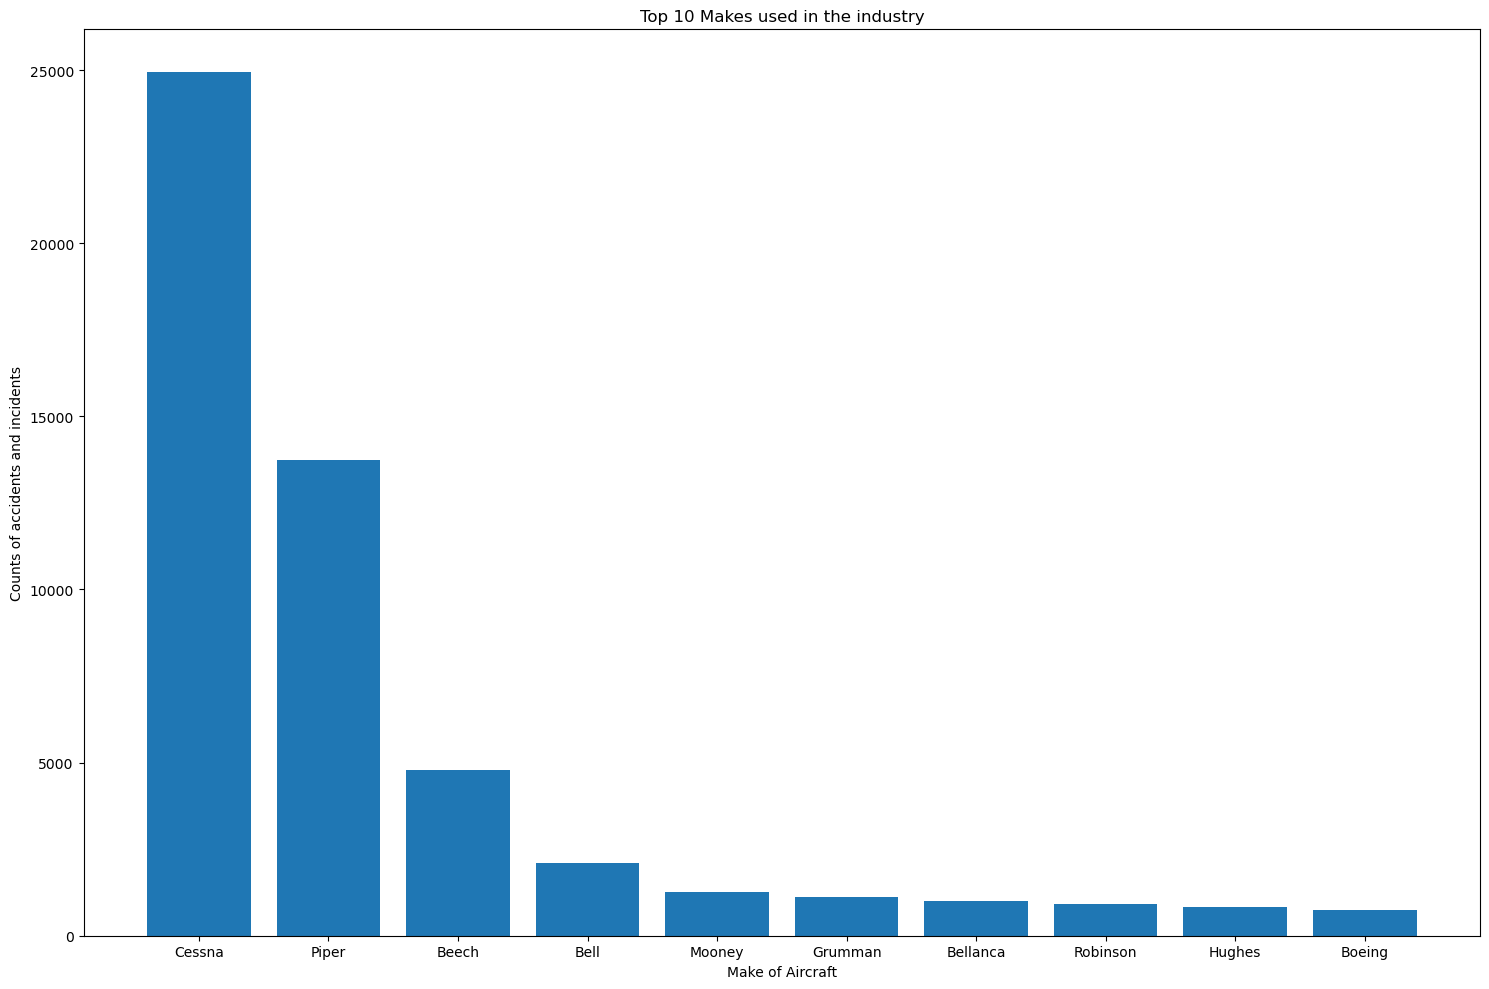

In [207]:
fig,ax = plt.subplots(figsize = (15,10))
fig.set_tight_layout(True)
ax.bar(Make_of_Aircraft[:10],Counts_of_accidents_incidents[:10])
ax.set_xlabel('Make of Aircraft')
ax.set_ylabel('Counts of accidents and incidents')
ax.set_title('Top 10 Makes used in the industry')
plt.show();

In [209]:
'''
The analysis of aircraft makes reveals that Cessna leads with the highest number of accidents, 
totaling 24,932, followed by Piper with 13,739 incidents. 
Conversely, several less common makes, such as C.B. Withun, Reinhold, and Zeidler, each recorded only one incident, 
indicating their rarity in the industry. This data highlights the need for potential buyers to consider both the prevalence
and safety records of different makes when making purchasing decisions.
'''

'\nThe analysis of aircraft makes reveals that Cessna leads with the highest number of accidents, \ntotaling 24,932, followed by Piper with 13,739 incidents. \nConversely, several less common makes, such as C.B. Withun, Reinhold, and Zeidler, each recorded only one incident, \nindicating their rarity in the industry. This data highlights the need for potential buyers to consider both the prevalence\nand safety records of different makes when making purchasing decisions.\n'

## 4. How does the status of being "Amateur Built" impact the severity of injuries in aviation accidents?
### This question contributes to a broader understanding of aviation safety, highlighting areas that may require attention to minimize risks and enhance passenger safety.

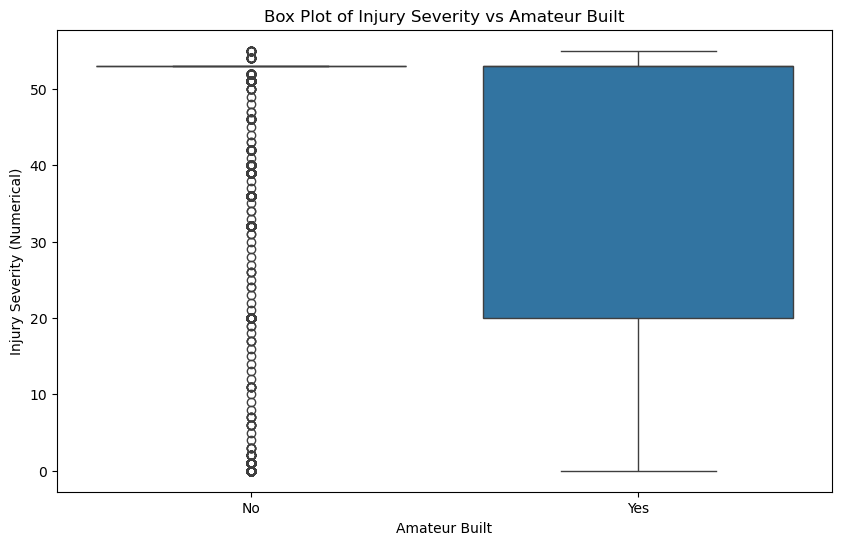

In [213]:
# Convert 'Injury Severity' from categorical data to numerical values
df_cleaned['Injury Severity Numeric'] = pd.Categorical(df_cleaned['Injury Severity']).codes
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the box plot using the ax object
sns.boxplot(x='Amateur Built', y='Injury Severity Numeric', data=df_cleaned, ax=ax)

# Set title and labels using the ax object
ax.set_title('Box Plot of Injury Severity vs Amateur Built')
ax.set_xlabel('Amateur Built')
ax.set_ylabel('Injury Severity (Numerical)')
plt.show();

In [215]:
'''
The box plot reveals a significant disparity in injury severity between amateur-built and professionally constructed aircraft,
with the latter generally associated with fewer and less severe injuries. The vertical line of points for non-amateur-built aircraft indicates consistency in lower injury severity. At the same time, the box plot for amateur-built planes shows a wider range of injury outcomes, suggesting potential safety concerns. 
This insight highlights the need to further examine safety practices and standards in amateur aircraft construction.
'''

'\nThe box plot reveals a significant disparity in injury severity between amateur-built and professionally constructed aircraft,\nwith the latter generally associated with fewer and less severe injuries. The vertical line of points for non-amateur-built aircraft indicates a consistency in lower injury severity,\nwhile the box plot for amateur-built planes shows a wider range of injury outcomes, suggesting potential safety concerns. \nThis insight highlights the need for further examination of safety practices and standards in amateur aircraft construction.\n'

## 5. How do different weather conditions impact the likelihood and severity of injuries in aviation accidents?"

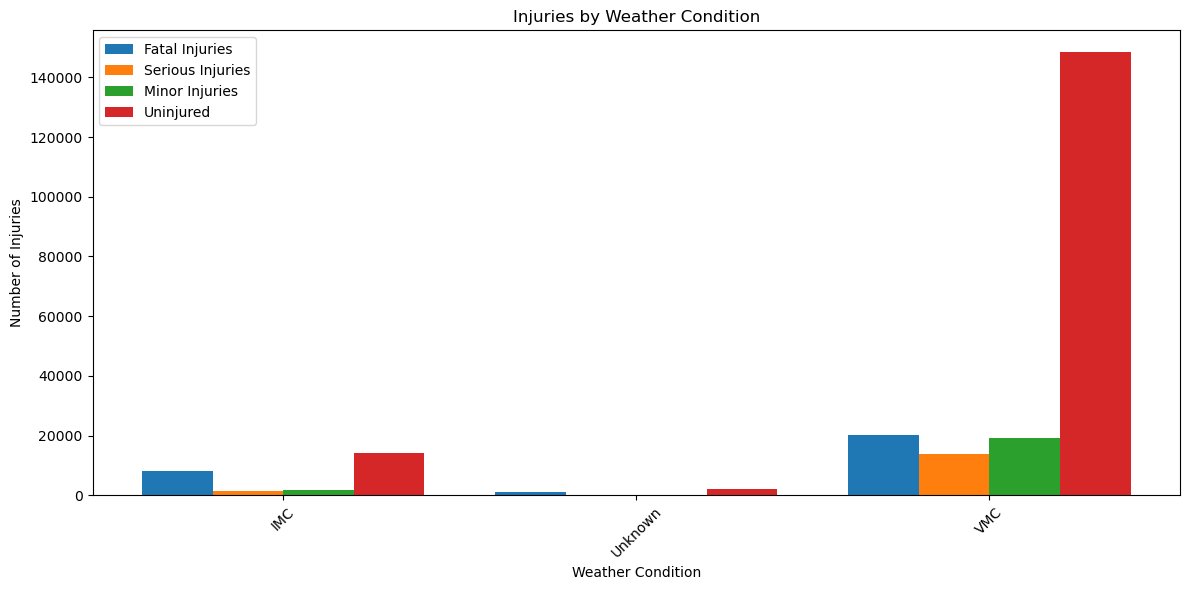

In [226]:
# Replacing 'UNK' and 'Unk' values with 'Unknown' in the cleaned DataFrame
df_cleaned['Weather Condition'].replace({'UNK': 'Unknown', 'Unk': 'Unknown'}, inplace=True)

# Grouping data by 'Weather Condition' and summing up injury counts
injuries_by_weather = df_cleaned.groupby('Weather Condition')[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].sum()

# Defining the number of bars per weather condition and their positions
bar_width = 0.2
index = np.arange(len(injuries_by_weather))

# Creating subplots for each injury type side by side
plt.figure(figsize=(12, 6))

# Plot each injury type next to each other
plt.bar(index, injuries_by_weather['Total Fatal Injuries'], bar_width, label='Fatal Injuries')
plt.bar(index + bar_width, injuries_by_weather['Total Serious Injuries'], bar_width, label='Serious Injuries')
plt.bar(index + 2 * bar_width, injuries_by_weather['Total Minor Injuries'], bar_width, label='Minor Injuries')
plt.bar(index + 3 * bar_width, injuries_by_weather['Total Uninjured'], bar_width, label='Uninjured')

# Adding labels and title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Injuries')
plt.title('Injuries by Weather Condition')
plt.xticks(index + bar_width * 1.5, injuries_by_weather.index, rotation=45)

# Adding a legend
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


In [228]:
'''
The analysis reveals that Visual Meteorological Conditions (VMC) account for the highest number of injuries across all categories, 
followed by Instrument Meteorological Conditions (IMC), with Unknown weather conditions coming in third. 
This suggests that flights operating under VMC are more prone to accidents, indicating potential safety concerns that could be addressed through improved training or procedural adjustments. 
Understanding the risks associated with different weather conditions can aid in developing targeted safety protocols to mitigate injuries in aviation incidents.
'''


'\nThe analysis reveals that Visual Meteorological Conditions (VMC) account for the highest number of injuries across all categories, \nfollowed by Instrument Meteorological Conditions (IMC), with Unknown weather conditions coming in third. \nThis suggests that flights operating under VMC are more prone to accidents, indicating potential safety concerns that could be addressed through improved training or procedural adjustments. \nUnderstanding the risks associated with different weather conditions can aid in developing targeted safety protocols to mitigate injuries in aviation incidents.\n'

## 6. How does the distribution of total fatal injuries vary across different weather conditions, and what implications does this have for safety measures in aviation?

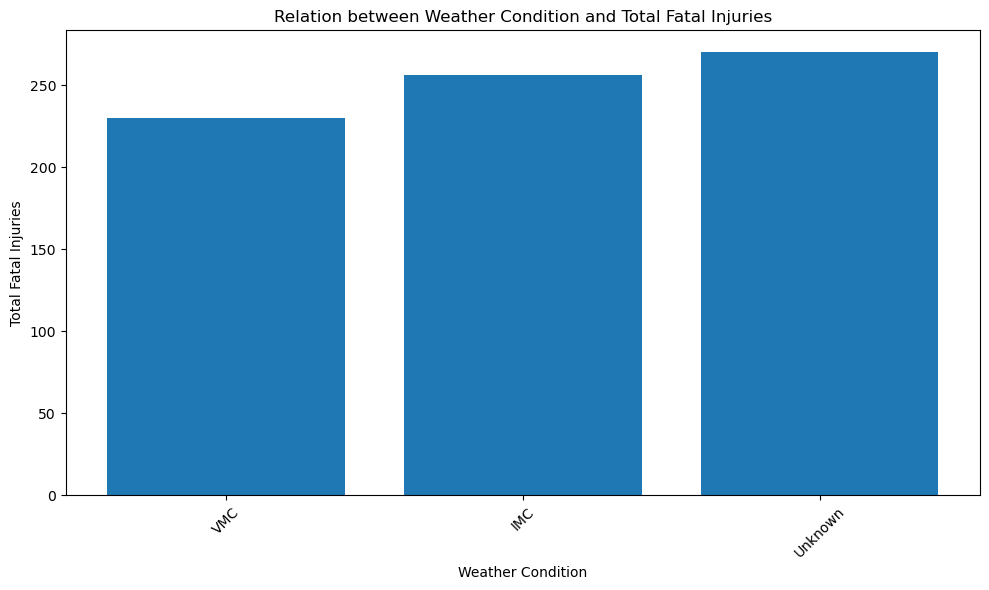

In [231]:
df_cleaned['Weather Condition'] = df_cleaned['Weather Condition'].replace('Unk', 'UNK')

weather_condition = df_cleaned['Weather Condition']  # Column for weather conditions
accidents = df_cleaned['Total Fatal Injuries']       # Column for the number of accidents (total fatal injuries)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bar plot
ax.bar(weather_condition, accidents)  # Correctly using the variable names

# Set labels and title

ax.set_xlabel('Weather Condition')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title('Relation between Weather Condition and Total Fatal Injuries')

# Rotate x-axis labels if weather conditions are categorical and long
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [235]:
'''
The bar plot illustrates that "Unknown" weather conditions lead to the highest number of total fatal injuries,
closely followed by Instrument Meteorological Conditions (IMC) and Visual Meteorological Conditions (VMC). 
Although "Unknown" conditions dominate the fatal injury counts, the differences among the three categories are relatively minor, 
suggesting that a thorough understanding and classification of weather conditions are crucial for enhancing aviation safety.
This indicates a need for better data collection and reporting on weather conditions to effectively address safety concerns.
'''

'\nThe bar plot illustrates that "Unknown" weather conditions lead to the highest number of total fatal injuries,\nclosely followed by Instrument Meteorological Conditions (IMC) and Visual Meteorological Conditions (VMC). \nAlthough "Unknown" conditions dominate the fatal injury counts, the differences among the three categories are relatively minor, \nsuggesting that a thorough understanding and classification of weather conditions are crucial for enhancing aviation safety.\nThis indicates a need for better data collection and reporting on weather conditions to effectively address safety concerns.\n'

## 7. How do the injury and damage statistics for different engine types influence regulatory policies and design improvements in aircraft engines?

               Total Fatal Injuries  Total Serious Injuries  \
Engine Type                                                   
Electric                        1.0                     1.0   
LR                              0.0                     8.0   
NONE                            0.0                     0.0   
Reciprocating               22225.0                 12918.0   
Turbo Fan                    3081.0                   585.0   
Turbo Jet                     630.0                   104.0   
Turbo Prop                   1950.0                   491.0   
Turbo Shaft                  1225.0                   982.0   
Unknown                       344.0                   218.0   

               Total Minor Injuries  Total Uninjured  
Engine Type                                           
Electric                        0.0              2.0  
LR                              1.0             10.0  
NONE                            0.0              2.0  
Reciprocating               168

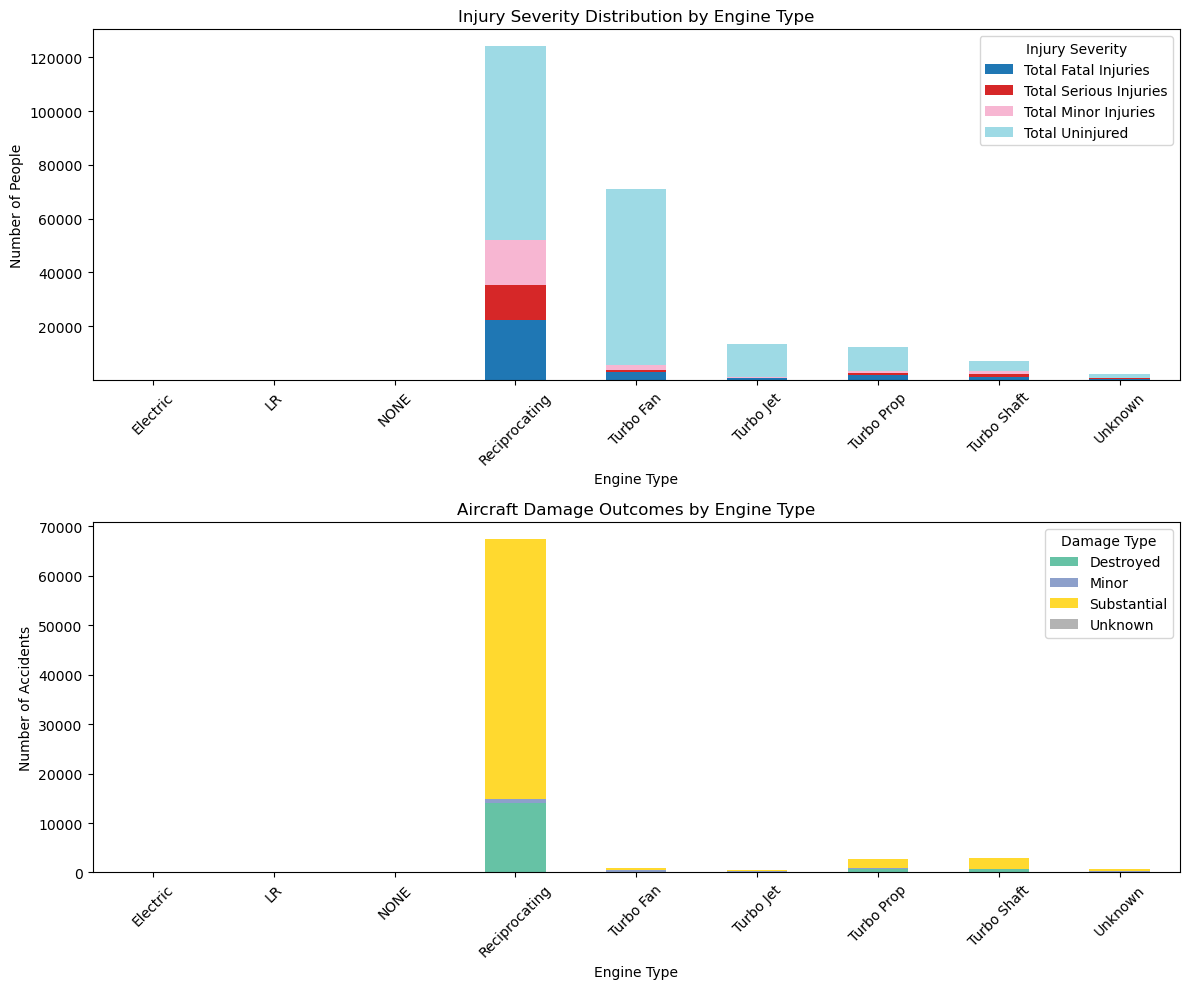

In [238]:
# Grouping data by 'Engine Type' and aggregating injury severities and accident outcomes
engine_type_analysis = df_cleaned.groupby('Engine Type')[['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']].sum()

# Adding counts of damage types per engine type
damage_by_engine_type = df_cleaned.groupby('Engine Type')['Aircraft Damage'].value_counts().unstack().fillna(0)
print(engine_type_analysis)
print(damage_by_engine_type)
# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plotting the injury severity distribution as a stacked bar plot
engine_type_analysis.plot(kind='bar', stacked=True, ax=ax1, colormap='tab20')

# Adding labels and title for the first subplot
ax1.set_title('Injury Severity Distribution by Engine Type')
ax1.set_xlabel('Engine Type')
ax1.set_ylabel('Number of People')
ax1.legend(title='Injury Severity')
ax1.set_xticklabels(engine_type_analysis.index, rotation=45)

# Plotting the aircraft damage outcomes as a stacked bar plot
damage_by_engine_type.plot(kind='bar', stacked=True, ax=ax2, colormap='Set2')

# Adding labels and title for the second subplot
ax2.set_title('Aircraft Damage Outcomes by Engine Type')
ax2.set_xlabel('Engine Type')
ax2.set_ylabel('Number of Accidents')
ax2.legend(title='Damage Type')
ax2.set_xticklabels(damage_by_engine_type.index, rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()



In [69]:
'''
###Key Insights:
Reciprocating Engines Show Higher Risk:
Both in terms of human injuries and aircraft damage, reciprocating engines seem to be associated with more severe accidents. This may suggest that they carry a higher operational risk compared to other engine types (e.g., turbine engines).
Turbine or Jet Engines May Be Safer (if present in the dataset):
If turbine-powered engines show fewer fatalities and less aircraft destruction, this suggests they may be safer options for commercial or private operations, depending on the data.

###Actionable Insights for the Aviation Division:
Focus on Turbine or Modern Engines:
Given the higher risks associated with reciprocating engines, the company may want to prioritize aircraft with turbine or jet engines, which could offer better safety outcomes.
Risk Mitigation Strategies:
If the business does intend to operate aircraft with reciprocating engines, additional risk mitigation strategies should be considered, such as enhanced pilot training, stricter maintenance protocols, or operating under more favorable weather conditions.
In summary, reciprocating engines, based on this analysis, seem to present higher risk both in terms of injury and damage severity, making them less desirable for minimizing operational risks in this new aviation venture.
'''

'\n###Key Insights:\nReciprocating Engines Show Higher Risk:\nBoth in terms of human injuries and aircraft damage, reciprocating engines seem to be associated with more severe accidents. This may suggest that they carry a higher operational risk compared to other engine types (e.g., turbine engines).\nTurbine or Jet Engines May Be Safer (if present in the dataset):\nIf turbine-powered engines show fewer fatalities and less aircraft destruction, this suggests they may be safer options for commercial or private operations, depending on the data.\n\n###Actionable Insights for the Aviation Division:\nFocus on Turbine or Modern Engines:\nGiven the higher risks associated with reciprocating engines, the company may want to prioritize aircraft with turbine or jet engines, which could offer better safety outcomes.\nRisk Mitigation Strategies:\nIf the business does intend to operate aircraft with reciprocating engines, additional risk mitigation strategies should be considered, such as enhanced

In [241]:
'''
The data shows that Reciprocating engines have the highest total fatalities (22,225) and serious injuries (12,918),
indicating a significant risk factor in aviation incidents. In contrast, Electric engines exhibit very low injury counts, 
suggesting a safer profile, though their data set is minimal. The Turbo Fan and Turbo Prop engines also demonstrate notable injury counts,
with thousands of serious and minor injuries, underscoring the need for targeted safety measures and investigations into these engine types to enhance overall aviation safety.
'''

'\nThe data shows that Reciprocating engines are associated with the highest total fatalities (22,225) and serious injuries (12,918),\nindicating a significant risk factor in aviation incidents. In contrast, Electric engines exhibit very low injury counts, \nsuggesting a safer profile, though their data set is minimal. The Turbo Fan and Turbo Prop engines also demonstrate notable injury counts,\nwith thousands of serious and minor injuries, underscoring the need for targeted safety measures and investigations into these engine types to enhance overall aviation safety.\n'


# Conclusion

This analysis of aviation accident data provides crucial insights to guide your company's expansion into the aviation industry. Our goal was to determine which aircraft present the **lowest risk** for purchase and operation, considering **safety outcomes**, **engine types**, and **weather conditions**.

### Key Findings:
- **Reciprocating engines** are associated with the highest fatality and injury rates, making aircraft equipped with these engines a **higher risk** choice.
- **Electric engines**, while less commonly used, show promising safety outcomes with **fewer recorded accidents** and **lower injury rates**. This makes them a potential **low-risk option** for the future.
- **Weather conditions** play a critical role:
  - Flights under **Visual Meteorological Conditions (VMC)** tend to have more severe accidents compared to **Instrument Meteorological Conditions (IMC)**, suggesting that well-equipped aircraft for **IMC** may offer **safer operating conditions**.

### Recommendations for Aircraft Purchase:
1. **Prioritize Aircraft with Electric Engines**:
   - Although less common, electric engines have demonstrated better safety outcomes, with fewer accidents and injuries. This makes them an attractive low-risk option for your fleet, particularly for smaller, **short-range flights** where electric aircraft are most applicable.
   
2. **Avoid or Minimize Aircraft with Reciprocating Engines**:
   - Aircraft with reciprocating engines pose a higher safety risk, with the **most fatalities and serious injuries** in recorded accidents. If necessary, restrict these aircraft to **less critical** operations.

3. **Invest in Aircraft Equipped for Instrument Meteorological Conditions (IMC)**:
   - Ensuring your fleet is capable of operating in **IMC** is crucial. Aircraft that perform well under these conditions have demonstrated **lower injury severities** compared to those flying under **VMC**. Look for aircraft with advanced avionics and safety systems for navigating **poor weather**.

### Actionable Insights:
- To mitigate risk, the company should **focus on acquiring aircraft with the safest engine types** (electric or modern engines with strong safety records).
- Additionally, **pilot training** and **operational focus on IMC conditions** will further reduce the likelihood of severe accidents, making your new aviation venture safer and more reliable.

By integrating these findings into your purchasing decisions, the company can begin operations with a fleet of **low-risk aircraft**, enhancing both **safety** and **operational efficiency** as you enter this new market.
h aviation industry.

